In [1]:
import pandas as pd

from settings import key
from datetime import datetime


In [2]:
coords = []

with open("server.log", "r") as f:
    while line := f.readline():
        if ('/api/v1/forecast/cities?lat=' in line or '/api/v1/forecast/cities/name?city_name=' in line) and '&health_check' not in line:
            coords.append([
                datetime.strptime(line.split(",")[0][1:], '%Y-%m-%d %H:%M:%S'), # time
            ])


In [3]:
df = pd.DataFrame(coords)


In [4]:
df

,0
0,2025-01-01 18:02:39
1,2025-01-01 18:02:58
2,2025-01-01 18:02:59
3,2025-01-01 18:03:18
4,2025-01-01 18:04:20
...,...
68305,2025-02-22 07:51:35
68306,2025-02-22 07:51:51
68307,2025-02-22 07:52:01
68308,2025-02-22 07:55:02


In [5]:
df.columns

RangeIndex(start=0, stop=1, step=1)

In [6]:
df["date_h"] = df[0].apply(lambda r: r.strftime("%Y-%m-%d %H"))

In [7]:
df.head()

,0,date_h
0,2025-01-01 18:02:39,2025-01-01 18
1,2025-01-01 18:02:58,2025-01-01 18
2,2025-01-01 18:02:59,2025-01-01 18
3,2025-01-01 18:03:18,2025-01-01 18
4,2025-01-01 18:04:20,2025-01-01 18


In [8]:
df_h = pd.DataFrame(df.groupby("date_h").count()[0]/3)

<Axes: xlabel='date_h'>

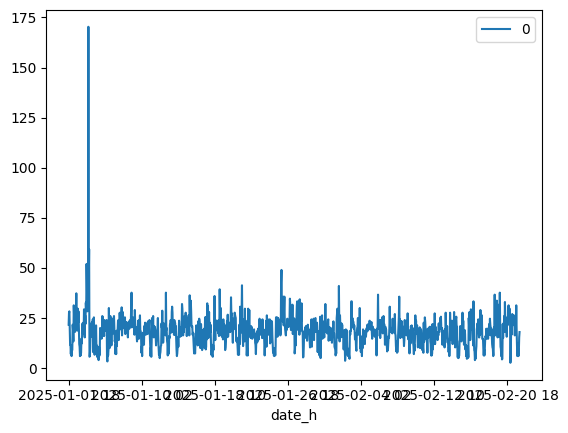

In [9]:
df_h.plot()

In [10]:
from sklearn import linear_model


In [11]:
reg = linear_model.LinearRegression()


In [12]:
import numpy as np


In [13]:
df_h_vals = df_h[0].values.reshape(-1, 1)
df_h_ct = np.array(range(len(df_h_vals))).reshape(-1, 1)


In [14]:
reg.fit(df_h_ct, df_h_vals)


LinearRegression()

In [15]:
import matplotlib.pyplot as plt


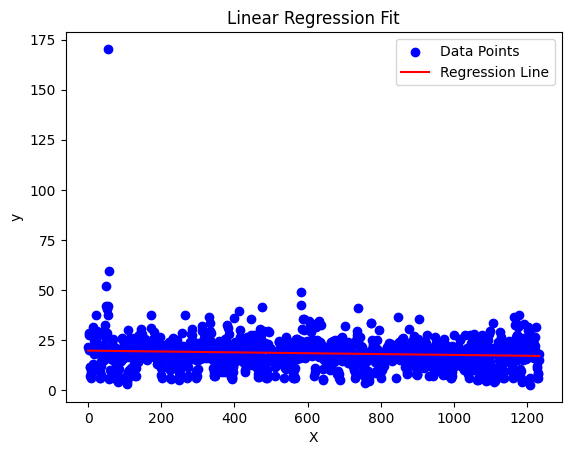

In [16]:
y_pred = reg.predict(df_h_ct)
plt.scatter(df_h_ct, df_h_vals, color='blue', label='Data Points')
plt.plot(df_h_ct, y_pred, color='red', label='Regression Line')

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Fit")

plt.show()